# Implementing Contrast Limited Adaptive Histogram Equalisation on CXR Images

### Objectives

The aim of this notebook is to implement the **CLAHE** technique on the CXR images to evaluate whether the increased contrast will benefit model generalisability to new data. Image segmentation will be evaluated as well, if feasible.
 
Once trained and evaluated, each version of the network will be further evaluated with the **GRAD-CAM** framework to visualise the regions of importance in the images. This will be observed in a separate notebook.

The experiment tracking will be conducted with the *Weights and Biases* platform. 

### Machine Configurations

`GPU` : NVIDIA GeForce RTX 4090;
`CPU` : AMD Ryzen 7 3700X 8-Core Processor;
`VRAM` : 24.0 GB

In [4]:
import os
import cv2
import glob
import matplotlib.pyplot as plt

img = cv2.imread("C:\\Users\\User\\Projects\\pneumonia-xray-classification\\artifacts\\train\\virus\\person1653_virus_2858.jpeg", 0)

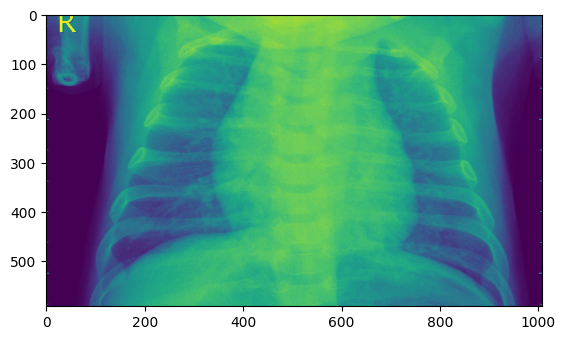

In [5]:
img = cv2.imread("C:\\Users\\User\\Projects\\pneumonia-xray-classification\\artifacts\\train\\virus\\person1653_virus_2858.jpeg", 0)
plt.imshow(img)

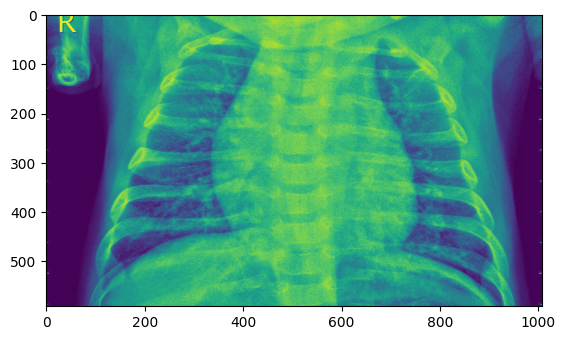

In [6]:
img = cv2.imread("C:\\Users\\User\\Projects\\pneumonia-xray-classification\\artifacts\\train\\virus\\person1653_virus_2858.jpeg", 0)

clahe_obj = cv2.createCLAHE(clipLimit=2, tileGridSize=(20, 20))
clahe_enhanced_img = clahe_obj.apply(img)

plt.imshow(clahe_enhanced_img)

### Create CLAHE-enhanced images:

In [7]:
image_dir = "..\\artifacts\\"
enhanced_dir = "..\\enhanced\\"

os.makedirs(enhanced_dir, exist_ok=True)

for root, dirs, files, in os.walk(image_dir, topdown=True):
    for file in files:
        if file.endswith((".png", ".jpg", ".jpeg")):
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path, 0)

            # Create CLAHE object:
            clahe_obj = cv2.createCLAHE(clipLimit=2, tileGridSize=(20, 20))
            clahe_enhanced_img = clahe_obj.apply(image)
            cv2.imwrite(f"{enhanced_dir}\\clahe_applied_{file}", clahe_enhanced_img)

### Sort CLAHE-enhanced images:

In [8]:
from src.sort_files import ImageSorter

ImageSorter(image_dir="..\\enhanced\\").initiate_image_sorting(output="..\\enhanced\\")